In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df_recuperado = pd.read_csv('pruebas_perfilometria/perfiles_2.csv')
diccionario_recuperado = {i: group[['X', 'Y']].values for i, group in df_recuperado.groupby('Array_ID')}

for i in range(99, 200):
    points = diccionario_recuperado[i]
    f,ax = plt.subplots(figsize=(6,6))
    ax.scatter(points[:,0], points[:,1], s = 1)
    ax.axis('equal')
    plt.savefig(f'imagenes/imagen_{i}.png')
    plt.close()

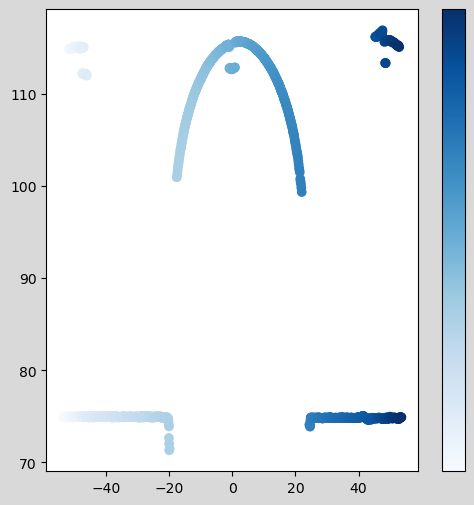

In [44]:
from matplotlib import colormaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors

def visualizar_puntos_en_orden(points, cmap = 'Blues', scat= False, ylims = None):
    '''
    Darle un repasito a esta funcion... el nombre no me gusta. Se puede mejorar ??
    '''
    x = points.iloc[:,0].values
    y = points.iloc[:,1].values

    z = np.linspace(0, 1, len(points)) 
    f, ax = plt.subplots(figsize=(6, 6),facecolor='.85')
    if scat:
        lc = ax.scatter(x, y, c=z, cmap=cmap)
    else:
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(x.min(), x.max()))
        lc.set_array(x)
        lc.set_linewidth(2)
        ax.add_collection(lc)
        ax.autoscale()
    
    cbar = plt.colorbar(lc, ax=ax)
    cbar.set_ticks([])  # Opcional: quitar las marcas de la barra de color
    if ylims: ax.set_ylim(ylims)
    plt.show()

visualizar_puntos_en_orden(pd.DataFrame(points), scat= True)